In [1]:
# in command prompt, cd to'C:/Users/PennSefton/OneDrive - 3Cloud/Data Science/Kickstarter'
# Then run 'streamlit run streamlit_explainability.py' 

import streamlit as st
import pandas as pd
import shap
import pickle
import numpy as np

In [2]:
st.title('Basic Shap Visualizations for Kickstarter Project')

2022-06-13 18:18:51.817 
  command:

    streamlit run C:\Users\PennSefton\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [3]:
x = pd.read_pickle('Tables/feature_df.pkl')
y = pd.read_csv('Tables/target_df.csv').drop(columns=['Unnamed: 0'])

In [4]:
full_data = pd.read_csv('Tables/loaded_data.csv').drop(columns=['Unnamed: 0'])

In [5]:
full_data = full_data.rename(columns={"name": "Project Name"})

In [6]:
y['state'] = y['state'].replace({'successful': 1, 'failed': 0})
full_data['state'] = full_data['state'].replace({'successful': 1, 'failed': 0})

In [7]:
x_train = pd.read_pickle('Tables/x_train.pkl')
x_test = pd.read_pickle('Tables/x_test.pkl')
y_train = pd.read_pickle('Tables/y_train.pkl')
y_test = pd.read_pickle('Tables/y_test.pkl')
model = pickle.load(open('Tables/finalized_model.pkl', 'rb'))

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [8]:
shap_values = pickle.load(open('Tables/shap_values.pkl', 'rb'))

In [9]:
id_column_name = 'Project Name'

In [11]:
x_project_id = x[['id']]
x_test_project_id = x_test.merge(x_project_id, left_index=True, right_index=True)
x_name_full = x.merge(full_data, left_on='id', right_on='id')
x_name = x_name_full[['id',id_column_name]]
x_test_full = x_test_project_id.merge(x_name, left_on = 'id', right_on = 'id')

In [17]:
shap_test = x_test.copy()
shap_test['order'] = np.arange(len(shap_test))
shap_test = shap_test[['order']]
shap_test_id = shap_test.merge(x_test_full, left_on='order', right_index=True).drop(columns=['order'])

In [18]:
shap_test_id

,goal,campaign_length,prep_time,month_of_launch,weekday_of_launch,hour_of_launch,location_state_CA,location_state_England,location_state_FL,location_state_IL,...,category_Narrative Film,category_Other,category_Performances,category_Poetry,category_Tabletop Games,category_Wearables,staff_pick_True,is_starrable_False,id,Project Name
5142,1000.0,30,2,10,0,15,False,False,False,False,...,False,False,False,False,False,False,False,True,2090953465,"1913 Strike Dance-Drama ""For They Are Women's ..."
24502,14000.0,30,21,12,3,16,False,False,False,False,...,False,False,False,False,False,False,False,True,88194079,The Quartet Project - Publication
20139,7000.0,37,16,4,3,2,False,False,False,False,...,False,False,False,False,False,False,False,True,264561501,Spicing up Sweet Auburn Avenue. Urban Nutcrack...
7907,1139.0,22,0,2,0,20,False,True,False,False,...,False,False,False,True,False,False,False,True,1298731864,Now You Know
1079,5000.0,30,24,9,1,18,True,False,False,False,...,False,True,False,False,False,False,False,True,1750396309,ReWrite: A Short Sci-Fi Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7423,80000.0,23,77,5,1,23,False,False,False,False,...,False,True,False,False,False,False,True,True,808028411,"""Blue Persimmons"" -The photo-book on aftermath..."
12614,6500.0,33,5,7,3,4,False,False,False,True,...,False,False,False,False,False,False,False,True,295816691,"The Samurnauts: Curse of the Dreadnuts, the Gr..."
24565,150000.0,50,39,9,1,16,False,False,False,False,...,False,True,False,False,False,False,True,True,1606381932,"Photo Exhibition ""Notas al Futuro"" by breve_ ""..."
15924,400.0,25,2,3,1,15,False,False,False,False,...,False,True,False,False,False,False,False,True,1899460377,Nostalgia Club: An enamel pin set


In [11]:
row_id_value = st.selectbox('Choose a Project Name', shap_test_id['Project Name'])

In [12]:
shap_reference = shap_test_id[shap_test_id[id_column_name]==row_id_value]['order'].values[0]

In [13]:
from streamlit_shap import st_shap

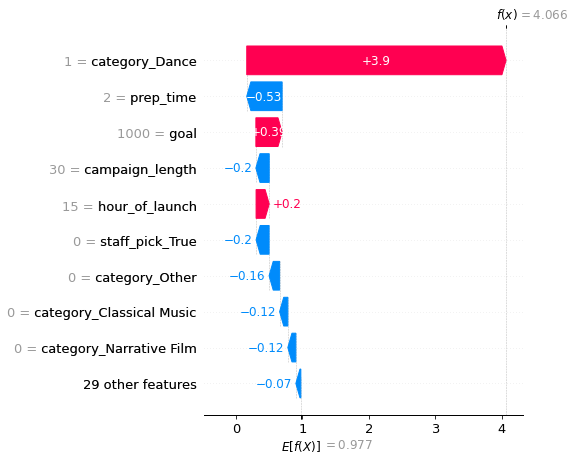

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [16]:
st_shap(shap.plots.waterfall(shap_values[:,:][shap_reference]), height=300)